In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn
import pandas as pd
import copy

In [19]:
with open("../data/agreement_results.10.layer=0.only_attractors=True.only_not_attractors=False.alpha=-4.0.classifier=sgd-log.pickle", "rb") as f:
    data = pickle.load(f)

In [20]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'sent_comp.pickle'])

In [21]:
data["simple_agrmt.pickle"]["src"]

{'acc_before': 1.0,
 'acc_after': 1.0,
 'prob_good_before': 0.06375382095575333,
 'prob_bad_before': 0.0007711435318924487,
 'prob_good_after': 0.06621469557285309,
 'prob_bad_after': 0.0008855639607645571}

In [22]:
len(data.keys())

7

In [23]:
data["obj_rel_across_anim.pickle"]

{'src': {'acc_before': 0.825,
  'acc_after': 0.83,
  'prob_good_before': 0.2228507548570633,
  'prob_bad_before': 0.0008936547674238682,
  'prob_good_after': 0.21257458627223969,
  'prob_bad_after': 0.0008467155857942998},
 'orc': {'acc_before': 0.825,
  'acc_after': 0.7775,
  'prob_good_before': 0.2228507548570633,
  'prob_bad_before': 0.0008936547674238682,
  'prob_good_after': 0.2392175793647766,
  'prob_bad_after': 0.001036559697240591},
 'orrc': {'acc_before': 0.825,
  'acc_after': 0.7925,
  'prob_good_before': 0.2228507548570633,
  'prob_bad_before': 0.0008936547674238682,
  'prob_good_after': 0.24278713762760162,
  'prob_bad_after': 0.0014790984569117427},
 'prc': {'acc_before': 0.825,
  'acc_after': 0.8125,
  'prob_good_before': 0.2228507548570633,
  'prob_bad_before': 0.0008936547674238682,
  'prob_good_after': 0.26148056983947754,
  'prob_bad_after': 0.0010263918666169047},
 'prrc': {'acc_before': 0.825,
  'acc_after': 0.755,
  'prob_good_before': 0.2228507548570633,
  'prob_

In [24]:
relevant = [k for k in data.keys() if "within" not in k]

In [25]:
relevant, len(relevant)

(['obj_rel_across_anim.pickle',
  'obj_rel_no_comp_across_inanim.pickle',
  'obj_rel_no_comp_across_anim.pickle',
  'subj_rel.pickle',
  'obj_rel_across_inanim.pickle',
  'simple_agrmt.pickle',
  'sent_comp.pickle'],
 7)

In [26]:
for k in copy.deepcopy(data):
    if k not in relevant:
        del data[k]

In [27]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'sent_comp.pickle'])

In [28]:
sims = np.zeros((len(data.keys()), 6))
print(sims.shape)
agrt_types = ["obj_rel_across_anim", "obj_rel_across_inanim", "obj_rel_no_comp_across_anim", "obj_rel_no_comp_across_inanim", "subj_rel", "sent_comp", "simple_agrmt"]
print("test", len(agrt_types), len(data.keys()))
#agrt_type2ind = {d:i for i,d in enumerate(data.keys())}
agrt_type2ind = {d+".pickle":i for i,d in enumerate(agrt_types)}
agrt_ind2type = {i:d for d,i in agrt_type2ind.items()}

rc_type2ind = {d:i for i,d in enumerate(data["obj_rel_across_anim.pickle"].keys())}
rc_ind2type = {i:d for d,i in rc_type2ind.items()}

print(len(rc_ind2type), len(agrt_type2ind))
print(rc_ind2type)
print(agrt_ind2type)

(7, 6)
test 7 7
6 7
{0: 'src', 1: 'orc', 2: 'orrc', 3: 'prc', 4: 'prrc', 5: 'all'}
{0: 'obj_rel_across_anim.pickle', 1: 'obj_rel_across_inanim.pickle', 2: 'obj_rel_no_comp_across_anim.pickle', 3: 'obj_rel_no_comp_across_inanim.pickle', 4: 'subj_rel.pickle', 5: 'sent_comp.pickle', 6: 'simple_agrmt.pickle'}


In [29]:
for k in data.keys():
    print(k)

obj_rel_across_anim.pickle
obj_rel_no_comp_across_inanim.pickle
obj_rel_no_comp_across_anim.pickle
subj_rel.pickle
obj_rel_across_inanim.pickle
simple_agrmt.pickle
sent_comp.pickle


In [30]:
for agreement_type in data.keys():
    for rc_type in data[agreement_type].keys():
        before = data[agreement_type][rc_type]["acc_before"]
        after = data[agreement_type][rc_type]["acc_after"]
        sims[agrt_type2ind[agreement_type], rc_type2ind[rc_type]] = str(((before-after)/before) * 100)

In [31]:
print(np.mean(sims[sims > 0]))

9.157208257311162


In [32]:
print(np.mean(sims))

3.220401326624452


In [33]:
labels_rows = [agrt_ind2type[i].split(".")[0] for i in range(len(agrt_ind2type))]
labels_columns = [rc_ind2type[i] for i in range(len(rc_ind2type))]

print(labels_rows)
print(labels_columns)

['obj_rel_across_anim', 'obj_rel_across_inanim', 'obj_rel_no_comp_across_anim', 'obj_rel_no_comp_across_inanim', 'subj_rel', 'sent_comp', 'simple_agrmt']
['src', 'orc', 'orrc', 'prc', 'prrc', 'all']


In [34]:
def plot(labels_rows, labels_columns, results, layer, classifier,iters):

    df_cm = pd.DataFrame(results, index = labels_rows,
                  columns = labels_columns)
    print(df_cm)
    fig = plt.figure(figsize = (10,10))
    ax = sn.heatmap(df_cm, annot=True)#, vmin = 0, vmax=100)
    #fig.set_size_inches(17, 4)
    plt.title("agreement accuracy drop (%) (rows) as a function of INLP-RC-type (columns). Layer: {}. classifier: {}. {}\n (Larger values indicate greater influence of INLP)".format(layer, classifier, iters))
    #plt.show()
    ax.figure.axes[-1].yaxis.label.set_size(50)
    plt.savefig("../results/plots/agreement-interaction:{}.classifier:{}.{}.only-attractors.alpha=-4.png".format(layer, classifier, iters), dpi=800)    
    plt.show()

                                    src        orc       orrc        prc  \
obj_rel_across_anim           -0.606061   5.757576   3.939394   1.515152   
obj_rel_across_inanim         -0.520833  -0.781250  -1.041667  -1.302083   
obj_rel_no_comp_across_anim    1.162791  30.987352  31.738372  14.902466   
obj_rel_no_comp_across_inanim  0.533333   0.533333   2.666667   1.066667   
subj_rel                      -1.377410  -1.377410  -5.234160  -0.826446   
sent_comp                     -0.251256   0.000000   0.251256   0.000000   
simple_agrmt                   0.000000   0.000000   0.000000   0.000000   

                                    prrc        all  
obj_rel_across_anim             8.484848  -0.606061  
obj_rel_across_inanim          -1.041667  -1.041667  
obj_rel_no_comp_across_anim    34.883721  15.116279  
obj_rel_no_comp_across_inanim   0.800000   1.333333  
subj_rel                       -1.101928  -3.305785  
sent_comp                       0.000000   0.000000  
simple_agrmt 

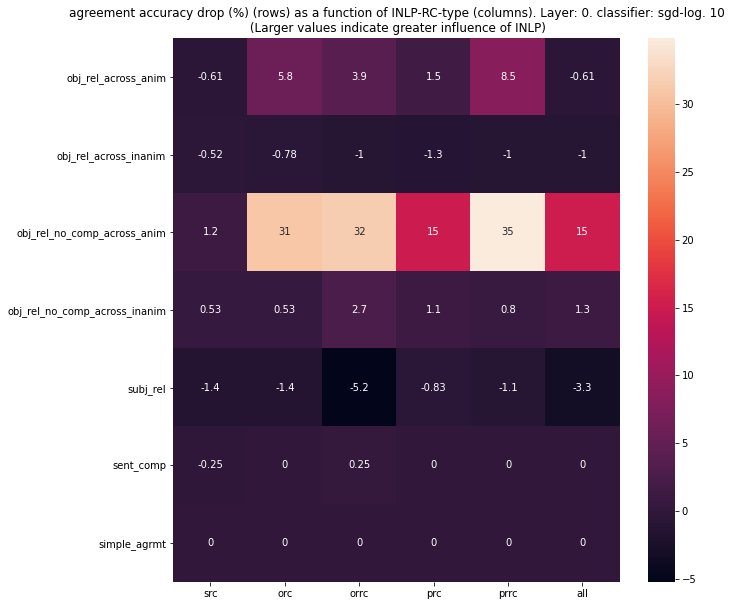

In [35]:
plot(labels_rows, labels_columns, sims, "0", "sgd-log", "10")